In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline

pd.set_option('display.max_colwidth', 100)

In [3]:
with open('demop.csv') as f:
    df = pd.read_csv(f)
f.close()

In [4]:
df

,Tweet,Subjectivity
0,0,Pronouns suck
1,1,?? Twitter sucks
2,2,Another government stimulus package is not in ...
3,3,Tesla solar panels are $1.49/Watt \n
4,4,"While in orbit, astronauts and performed a h..."
5,5,Impressive Tianwen-1 Mars rover mission launch...
6,6,Das baby kann noch keinen löffel benutzen
7,7,"You don’t have a soul, you are a soul"
8,8,2 minutes later …
9,9,Coming soon


In [5]:
import pandas as pd
import nltk

df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['Subjectivity']), axis=1)
 

In [6]:
df

,Tweet,Subjectivity,tokenized_sents
0,0,Pronouns suck,"[Pronouns, suck]"
1,1,?? Twitter sucks,"[?, ?, Twitter, sucks]"
2,2,Another government stimulus package is not in ...,"[Another, government, stimulus, package, is, not, in, ...]"
3,3,Tesla solar panels are $1.49/Watt \n,"[Tesla, solar, panels, are, $, 1.49/Watt, \n]"
4,4,"While in orbit, astronauts and performed a h...","[While, in, orbit, ,, astronauts, and, performed, a, h, ...]"
5,5,Impressive Tianwen-1 Mars rover mission launch...,"[Impressive, Tianwen-1, Mars, rover, mission, launch, ...]"
6,6,Das baby kann noch keinen löffel benutzen,"[Das, baby, kann, noch, keinen, löffel, benutzen]"
7,7,"You don’t have a soul, you are a soul","[You, don, ’, t, have, a, soul, ,, you, are, a, soul]"
8,8,2 minutes later …,"[2, minutes, later, …]"
9,9,Coming soon,"[Coming, soon]"


In [7]:
def check_find_punctuations(text): 
    
    # regular expression containing 
    # all punctuation 
    result = re.findall(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*',  
                        text) 
      
    # form a string 
    string = "".join(result) 
      
    # list of strings return 
    return list(string) 
    
    
# creating new column name 
# as a punctuation_used and  
# applying user defined function 
# on each rows of Comments column 
df['punctuation_used'] = df['Subjectivity'].apply( 
                         lambda x : check_find_punctuations(x) 
                         )


  
# show the Dataframe 



In [8]:
df

,Tweet,Subjectivity,tokenized_sents,punctuation_used
0,0,Pronouns suck,"[Pronouns, suck]",[]
1,1,?? Twitter sucks,"[?, ?, Twitter, sucks]","[?, ?]"
2,2,Another government stimulus package is not in ...,"[Another, government, stimulus, package, is, not, in, ...]","[., ., .]"
3,3,Tesla solar panels are $1.49/Watt \n,"[Tesla, solar, panels, are, $, 1.49/Watt, \n]","[$, ., /, \]"
4,4,"While in orbit, astronauts and performed a h...","[While, in, orbit, ,, astronauts, and, performed, a, h, ...]","[,, ., ., .]"
5,5,Impressive Tianwen-1 Mars rover mission launch...,"[Impressive, Tianwen-1, Mars, rover, mission, launch, ...]","[-, ., ., .]"
6,6,Das baby kann noch keinen löffel benutzen,"[Das, baby, kann, noch, keinen, löffel, benutzen]",[]
7,7,"You don’t have a soul, you are a soul","[You, don, ’, t, have, a, soul, ,, you, are, a, soul]","[,]"
8,8,2 minutes later …,"[2, minutes, later, …]",[]
9,9,Coming soon,"[Coming, soon]",[]


In [9]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [10]:
df["punctuation_removed"] = df['Subjectivity'].apply(remove_punctuations)
df

,Tweet,Subjectivity,tokenized_sents,punctuation_used,punctuation_removed
0,0,Pronouns suck,"[Pronouns, suck]",[],Pronouns suck
1,1,?? Twitter sucks,"[?, ?, Twitter, sucks]","[?, ?]",Twitter sucks
2,2,Another government stimulus package is not in ...,"[Another, government, stimulus, package, is, not, in, ...]","[., ., .]",Another government stimulus package is not in
3,3,Tesla solar panels are $1.49/Watt \n,"[Tesla, solar, panels, are, $, 1.49/Watt, \n]","[$, ., /, \]",Tesla solar panels are 149Watt n
4,4,"While in orbit, astronauts and performed a h...","[While, in, orbit, ,, astronauts, and, performed, a, h, ...]","[,, ., ., .]",While in orbit astronauts and performed a h
5,5,Impressive Tianwen-1 Mars rover mission launch...,"[Impressive, Tianwen-1, Mars, rover, mission, launch, ...]","[-, ., ., .]",Impressive Tianwen1 Mars rover mission launch
6,6,Das baby kann noch keinen löffel benutzen,"[Das, baby, kann, noch, keinen, löffel, benutzen]",[],Das baby kann noch keinen löffel benutzen
7,7,"You don’t have a soul, you are a soul","[You, don, ’, t, have, a, soul, ,, you, are, a, soul]","[,]",You don’t have a soul you are a soul
8,8,2 minutes later …,"[2, minutes, later, …]",[],2 minutes later …
9,9,Coming soon,"[Coming, soon]",[],Coming soon


In [11]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

STOP_WORDS.remove("not")

print(len(STOP_WORDS))
print(STOP_WORDS)
df['stopword_remove'] = df['punctuation_removed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOP_WORDS)]))
df

311
{'four', 'would', 'keep', 'most', 'get', 'wherever', 'really', 'whence', 'except', 'into', 'nor', 'sixty', 'thru', "'ll", 'since', 'so', 'therein', 'see', 'did', 'also', 'every', 'eleven', 'somehow', 'anyhow', 'give', 'toward', 'through', 'myself', 'none', 'only', 'than', 'somewhere', 'were', 'latterly', 'other', 'becomes', 'others', 'over', 'few', 'them', 'herself', 'with', 'him', 'about', 'bottom', 'less', 'i', 'until', 'else', 'three', 'using', 'five', 'an', 'being', 'has', 'whether', 'six', 'mostly', 'those', 'top', 'during', 'and', 'whoever', 'former', 'there', 'if', 'empty', 'throughout', 'name', 'amount', 'twenty', 'third', 'yourselves', 'thus', 'used', 'while', 'who', 'of', 'regarding', 'how', 'hers', 'my', 'without', 'around', 'along', 'on', 'side', 'however', 'nobody', 'ten', 'what', 'out', 'own', 'nowhere', 'alone', 'sometimes', 'us', 'hereby', 'twelve', 'whatever', 'beforehand', 'back', 'anything', 'everything', 'fifteen', 'between', 'herein', 'full', 'almost', 'both', 

,Tweet,Subjectivity,tokenized_sents,punctuation_used,punctuation_removed,stopword_remove
0,0,Pronouns suck,"[Pronouns, suck]",[],Pronouns suck,Pronouns suck
1,1,?? Twitter sucks,"[?, ?, Twitter, sucks]","[?, ?]",Twitter sucks,Twitter sucks
2,2,Another government stimulus package is not in ...,"[Another, government, stimulus, package, is, not, in, ...]","[., ., .]",Another government stimulus package is not in,Another government stimulus package not
3,3,Tesla solar panels are $1.49/Watt \n,"[Tesla, solar, panels, are, $, 1.49/Watt, \n]","[$, ., /, \]",Tesla solar panels are 149Watt n,Tesla solar panels 149Watt n
4,4,"While in orbit, astronauts and performed a h...","[While, in, orbit, ,, astronauts, and, performed, a, h, ...]","[,, ., ., .]",While in orbit astronauts and performed a h,While orbit astronauts performed h
5,5,Impressive Tianwen-1 Mars rover mission launch...,"[Impressive, Tianwen-1, Mars, rover, mission, launch, ...]","[-, ., ., .]",Impressive Tianwen1 Mars rover mission launch,Impressive Tianwen1 Mars rover mission launch
6,6,Das baby kann noch keinen löffel benutzen,"[Das, baby, kann, noch, keinen, löffel, benutzen]",[],Das baby kann noch keinen löffel benutzen,Das baby kann noch keinen löffel benutzen
7,7,"You don’t have a soul, you are a soul","[You, don, ’, t, have, a, soul, ,, you, are, a, soul]","[,]",You don’t have a soul you are a soul,You don’t soul soul
8,8,2 minutes later …,"[2, minutes, later, …]",[],2 minutes later …,2 minutes later …
9,9,Coming soon,"[Coming, soon]",[],Coming soon,Coming soon


In [12]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [13]:
from textblob import TextBlob
def getTextSubjectivity(stopword_remove):
    return TextBlob(stopword_remove).sentiment.subjectivity


def getTextPolarity(stopword_remove):
    return TextBlob(stopword_remove).sentiment.polarity

In [14]:
df['Subjectivity'] = df['stopword_remove'].apply(getTextSubjectivity)
df['Polarity'] = df['stopword_remove'].apply(getTextPolarity)

In [15]:
df.head(13)


,Tweet,Subjectivity,tokenized_sents,punctuation_used,punctuation_removed,stopword_remove,Polarity
0,0,0.0,"[Pronouns, suck]",[],Pronouns suck,Pronouns suck,0.00
1,1,0.3,"[?, ?, Twitter, sucks]","[?, ?]",Twitter sucks,Twitter sucks,-0.30
2,2,0.0,"[Another, government, stimulus, package, is, not, in, ...]","[., ., .]",Another government stimulus package is not in,Another government stimulus package not,0.00
3,3,0.0,"[Tesla, solar, panels, are, $, 1.49/Watt, \n]","[$, ., /, \]",Tesla solar panels are 149Watt n,Tesla solar panels 149Watt n,0.00
4,4,0.0,"[While, in, orbit, ,, astronauts, and, performed, a, h, ...]","[,, ., ., .]",While in orbit astronauts and performed a h,While orbit astronauts performed h,0.00
5,5,1.0,"[Impressive, Tianwen-1, Mars, rover, mission, launch, ...]","[-, ., ., .]",Impressive Tianwen1 Mars rover mission launch,Impressive Tianwen1 Mars rover mission launch,1.00
6,6,0.0,"[Das, baby, kann, noch, keinen, löffel, benutzen]",[],Das baby kann noch keinen löffel benutzen,Das baby kann noch keinen löffel benutzen,0.00
7,7,0.0,"[You, don, ’, t, have, a, soul, ,, you, are, a, soul]","[,]",You don’t have a soul you are a soul,You don’t soul soul,0.00
8,8,0.0,"[2, minutes, later, …]",[],2 minutes later …,2 minutes later …,0.00
9,9,0.0,"[Coming, soon]",[],Coming soon,Coming soon,0.00


In [16]:
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [17]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

In [18]:
df.head(14)

,Tweet,Subjectivity,tokenized_sents,punctuation_used,punctuation_removed,stopword_remove,Polarity,Score
0,0,0.0,"[Pronouns, suck]",[],Pronouns suck,Pronouns suck,0.00,Neutral
1,1,0.3,"[?, ?, Twitter, sucks]","[?, ?]",Twitter sucks,Twitter sucks,-0.30,Negative
2,2,0.0,"[Another, government, stimulus, package, is, not, in, ...]","[., ., .]",Another government stimulus package is not in,Another government stimulus package not,0.00,Neutral
3,3,0.0,"[Tesla, solar, panels, are, $, 1.49/Watt, \n]","[$, ., /, \]",Tesla solar panels are 149Watt n,Tesla solar panels 149Watt n,0.00,Neutral
4,4,0.0,"[While, in, orbit, ,, astronauts, and, performed, a, h, ...]","[,, ., ., .]",While in orbit astronauts and performed a h,While orbit astronauts performed h,0.00,Neutral
5,5,1.0,"[Impressive, Tianwen-1, Mars, rover, mission, launch, ...]","[-, ., ., .]",Impressive Tianwen1 Mars rover mission launch,Impressive Tianwen1 Mars rover mission launch,1.00,Positive
6,6,0.0,"[Das, baby, kann, noch, keinen, löffel, benutzen]",[],Das baby kann noch keinen löffel benutzen,Das baby kann noch keinen löffel benutzen,0.00,Neutral
7,7,0.0,"[You, don, ’, t, have, a, soul, ,, you, are, a, soul]","[,]",You don’t have a soul you are a soul,You don’t soul soul,0.00,Neutral
8,8,0.0,"[2, minutes, later, …]",[],2 minutes later …,2 minutes later …,0.00,Neutral
9,9,0.0,"[Coming, soon]",[],Coming soon,Coming soon,0.00,Neutral


In [19]:
positive = df[df['Score'] == 'Positive']

print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")

15.384615384615385 % of positive tweets


<BarContainer object of 3 artists>

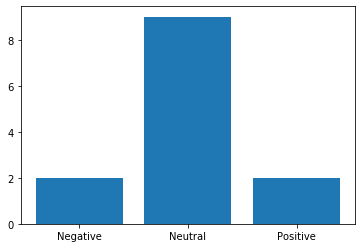

In [20]:
labels = df.groupby('Score').count().index.values

values = df.groupby('Score').size().values

plt.bar(labels, values)

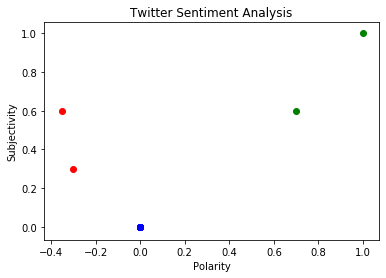

In [21]:
for index, row in df.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
# add legend
plt.show()

In [22]:
objective = df[df['Subjectivity'] == 0]

print(str(objective.shape[0]/(df.shape[0])*100) + " % of objective tweets")

69.23076923076923 % of objective tweets
